In [7]:
# Ivan Chow
# I pledge my honor that I have abided by the Stevens Honor System.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing


housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns = housing.feature_names)
Y = pd.DataFrame(housing.target, columns = ['PRICE'])

# X.head()
# Y.head()



# Splitting Training Data into Training and Test Sets


In [12]:
# 80% training 20% testing

def manual_train_test_split(X, Y, test_size=0.2):
    # Get the number of data points
    num_data_points = X.shape[0]

    # Generate shuffled indices
    shuffled_indices = np.random.permutation(num_data_points)

    # Calculate the number of test samples
    test_set_size = int(num_data_points * test_size)

    # Split indices into test and train
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]

    # Use the indices to split the data
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    Y_train = Y.iloc[train_indices]
    Y_test = Y.iloc[test_indices]

    return X_train, X_test, Y_train, Y_test

# Perform the manual train-test split
X_train, X_test, Y_train, Y_test = manual_train_test_split(X, Y, test_size=0.2)

#Adding Intercept Terms

In [13]:
X_train_intercept = np.column_stack([np.ones(X_train.shape[0]), X_train])
X_test_intercept = np.column_stack([np.ones(X_test.shape[0]), X_test])

#Compute Normal Equation

In [16]:
#   w*= (X^T * X)^-1 * X^T * y

XtX = np.dot(X_train_intercept.T, X_train_intercept)
XtX_inv = np.linalg.inv(XtX)
XtY = np.dot(X_train_intercept.T, Y_train)
theta = np.dot(XtX_inv, XtY)

#Predictions

In [17]:
Y_pred_test = np.dot(X_test_intercept, theta)

#MSE

In [18]:
mse = np.mean((Y_pred_test - Y_test) ** 2)
print(f"MSE: {mse}")

MSE: 0.5336765258139041


#Stochastic Gradient Descent

In [19]:
def standardize(X_train, X_test):
  mean = np.mean(X_train, axis = 0)
  std = np.std(X_train, axis = 0)

  # prevent div by 0
  std[std == 0] = 1

  X_train_scaled = (X_train - mean) / std
  X_test_scaled = (X_test - mean) / std
  return X_train_scaled, X_test_scaled

In [20]:
X_train_scaled, X_test_scaled = standardize(X_train.values, X_test.values)

In [21]:
X_train_intercept_scaled = np.column_stack([np.ones(X_train_scaled.shape[0]), X_train_scaled])
X_test_intercept_scaled = np.column_stack([np.ones(X_test_scaled.shape[0]), X_test_scaled])

In [57]:
def sgd(X, y, X_val, Y_val, learning_rate=0.01, n_iterations = 1000):
    m, n = X.shape
    theta = np.random.randn(n, 1)  # Initialize theta with random values
    Y = y.values.reshape(-1, 1)    # Reshape y to be a column vector
    Y_val = Y_val.values.reshape(-1, 1)
    mse_history = []  # List to store MSE values over iterations
    valid_loss = []

    for iteration in range(n_iterations):
        for i in range(m):
            random_index = np.random.randint(m)
            Xi = X[random_index:random_index+1]
            Yi = Y[random_index:random_index+1]
            gradients = 2 * Xi.T.dot(Xi.dot(theta) - Yi)
            theta = theta - learning_rate * gradients

        # Store MSE for every iteration
        mse = np.mean((X.dot(theta) - Y) ** 2)
        mse_history.append(mse)

        val_mse = np.mean((X_val.dot(theta) - Y_val) ** 2)
        valid_loss.append(val_mse)

        if iteration % 100 == 0 and iteration != 0:
            print(f"Iteration {iteration}: MSE = {mse}")

    return theta, mse_history, valid_loss

In [63]:
# train model using SGD
#theta_sgd, mse_history = sgd(X_train_intercept_scaled, Y_train, learning_rate=0.00001, n_iterations=100)
theta_sgd, mse_history, valid_loss = sgd(X_train_intercept_scaled, Y_train, X_test_intercept_scaled, Y_test, learning_rate=0.00001, n_iterations=100)

#Evaluating Model

In [43]:
Y_pred_sgd = np.dot(X_test_intercept_scaled, theta_sgd)

In [44]:
mse_sgd = np.mean((Y_pred_sgd - Y_test.values) ** 2)
print(f"SGD MSE: {mse_sgd}")

SGD MSE: 0.5336928598260782


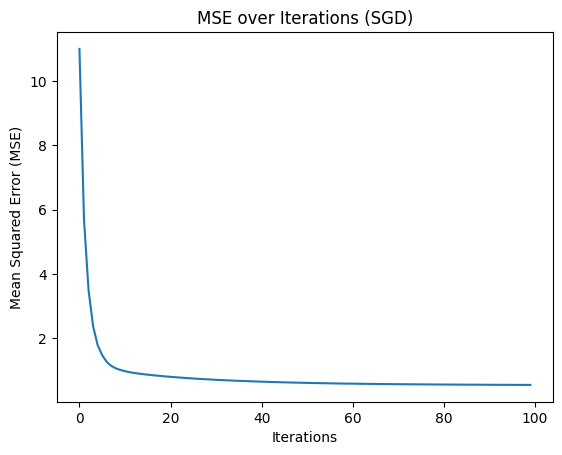

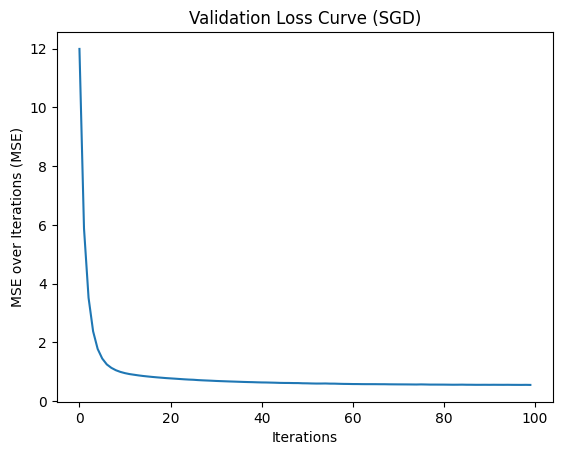

In [66]:
plt.plot(mse_history)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE over Iterations (SGD)')
plt.show()

plt.plot(valid_loss)
plt.xlabel('Iterations')
plt.ylabel('MSE over Iterations (MSE)')
plt.title('Validation Loss Curve (SGD)')
plt.show()


#MSE on Test Data

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_intercept, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test_intercept)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error (MSE) on Test Data: {mse}")


Mean Squared Error (MSE) on Test Data: 0.5336765258137047
